## Setting Up the Environment

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET OVERVIEW

In [5]:
df=pd.read_csv("charcters_stats.csv")

In [7]:
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [9]:
df.shape

(611, 9)

In [11]:
df.columns

Index(['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability',
       'Power', 'Combat', 'Total'],
      dtype='object')

## Standardizing Column Names
We clean and standardize the column names in our DataFrame, df. We do this by converting all column names to lowercase .

In [13]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'alignment', 'intelligence', 'strength', 'speed', 'durability',
       'power', 'combat', 'total'],
      dtype='object')

## Datatypes of all the columns of the dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          611 non-null    object
 1   alignment     608 non-null    object
 2   intelligence  611 non-null    int64 
 3   strength      611 non-null    int64 
 4   speed         611 non-null    int64 
 5   durability    611 non-null    int64 
 6   power         611 non-null    int64 
 7   combat        611 non-null    int64 
 8   total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


## DATA CLEANING

## Identifying Missing Values

In [52]:
df.isnull().sum()

name            0
alignment       3
intelligence    0
strength        0
speed           0
durability      0
power           0
combat          0
total           0
dtype: int64

### Dataset where Alignment column has nulll values.

In [56]:
df[df.alignment.isnull()]

,name,alignment,intelligence,strength,speed,durability,power,combat,total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


In [17]:
df['alignment'].value_counts()

alignment
good       432
bad        165
neutral     11
Name: count, dtype: int64

In [60]:
# Replace all null values in the Alignment column.
df.fillna({'alignment':'good'},inplace=True)

In [62]:
df.isnull().sum()

name            0
alignment       0
intelligence    0
strength        0
speed           0
durability      0
power           0
combat          0
total           0
dtype: int64

## Superheroes from the original dataset

In [66]:
good=df[df['alignment'] == 'good']
good.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


## Superheroes with the highest speed

In [21]:
good.sort_values(by=["speed"],ascending=False)

,name,alignment,intelligence,strength,speed,durability,power,combat,total
231,Flash III,good,63,10,100,60,83,32,348
304,Jack of Hearts,good,63,55,100,30,70,30,348
295,Impulse,good,50,10,100,60,63,60,343
525,Stardust,good,88,85,100,110,100,85,568
447,Quicksilver,good,63,28,100,60,57,56,364
...,...,...,...,...,...,...,...,...,...
280,Hellstorm,good,1,1,1,1,0,1,5
445,Quantum,good,1,1,1,1,0,1,5
277,Hawkwoman III,good,1,1,1,1,0,1,5
276,Hawkwoman II,good,1,1,1,1,0,1,5


## Top  superheroes with highest speed.

In [73]:
max_good_speed=good[good['speed'] == 100]
max_good_speed

,name,alignment,intelligence,strength,speed,durability,power,combat,total
85,Black Bolt,good,75,67,100,84,100,56,482
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348
232,Flash IV,good,63,10,100,32,59,48,312
295,Impulse,good,50,10,100,60,63,60,343
304,Jack of Hearts,good,63,55,100,30,70,30,348
333,Krypto,good,9,80,100,90,72,40,391
418,Nova,good,38,60,100,100,100,25,423
447,Quicksilver,good,63,28,100,60,57,56,364


## Superheroes with the highest Power

In [25]:
good.sort_values(by=["power"],ascending=False)

,name,alignment,intelligence,strength,speed,durability,power,combat,total
609,Zatanna,good,75,10,23,28,100,56,292
546,Thor,good,69,100,92,100,100,85,546
511,Spawn,good,75,60,50,90,100,95,470
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
...,...,...,...,...,...,...,...,...,...
127,Bumbleboy,good,1,1,1,1,0,1,5
124,Brother Voodoo,good,1,1,1,1,0,1,5
415,Nite Owl II,good,1,1,1,1,0,1,5
120,Box III,good,1,1,1,1,0,1,5


## Top 5 superheroes with the highest Intelligence

In [83]:
good.sort_values(by=["intelligence"],ascending=False).head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
361,Martian Manhunter,good,100,100,96,100,100,85,581
589,Watcher,good,100,80,67,89,100,56,492
306,Jean Grey,good,100,80,67,100,100,70,517
198,Doctor Strange,good,100,10,12,84,100,60,366
440,Professor X,good,100,8,12,14,90,32,256


## The best superheros

In [88]:
good_total=good.sort_values(by=["total"],ascending=False)
good_total

,name,alignment,intelligence,strength,speed,durability,power,combat,total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544
...,...,...,...,...,...,...,...,...,...
127,Bumbleboy,good,1,1,1,1,0,1,5
405,Namor,good,1,1,1,1,0,1,5
124,Brother Voodoo,good,1,1,1,1,0,1,5
409,Nathan Petrelli,good,1,1,1,1,0,1,5


## Top 5 superheroes with highest Total

In [91]:
good_total.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544


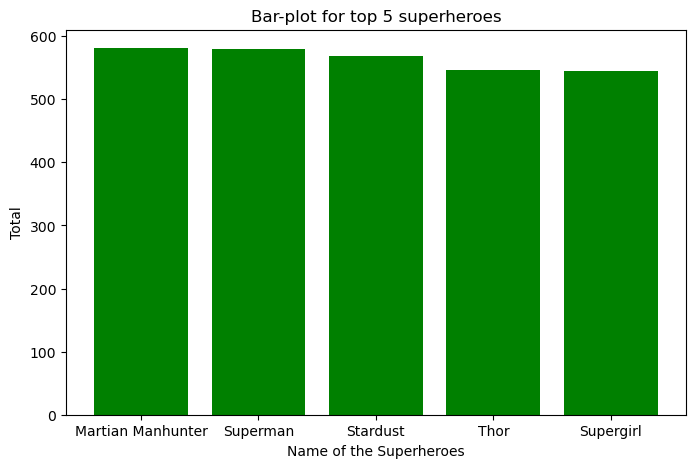

In [112]:
plt.figure(figsize=(8,5))
plt.bar(list(good_max_power['name'])[0:5],list(good_max_power['total'])[0:5],color='g')
plt.title('Bar-plot for top 5 superheroes')
plt.xlabel('Name of the Superheroes')
plt.ylabel('Total')
plt.show()

## Supervillains from the original dataset

In [36]:
bad=df[df['alignment'] == 'bad']
bad.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


## The most intelligent supervillains

In [38]:
bad.sort_values(by=["intelligence"],ascending=False).head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
336,Leader,bad,100,10,12,14,58,42,236
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429


## Supervillains with the highest Strength

In [100]:
bad.sort_values(by=["strength"],ascending=False).head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
180,Darkseid,bad,88,100,23,100,100,95,506
84,Black Adam,bad,88,100,92,100,89,56,525
535,Superboy-Prime,bad,94,100,100,100,100,85,579
542,Thanos,bad,88,100,17,100,100,80,485
5,Abraxas,bad,88,100,83,99,100,56,526


## The best Supervillains

In [103]:
# Top 5 supervillains with highest Total.
bad.sort_values(by=["total"],ascending=False).head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


## Top 5 supervillains with highest Total.

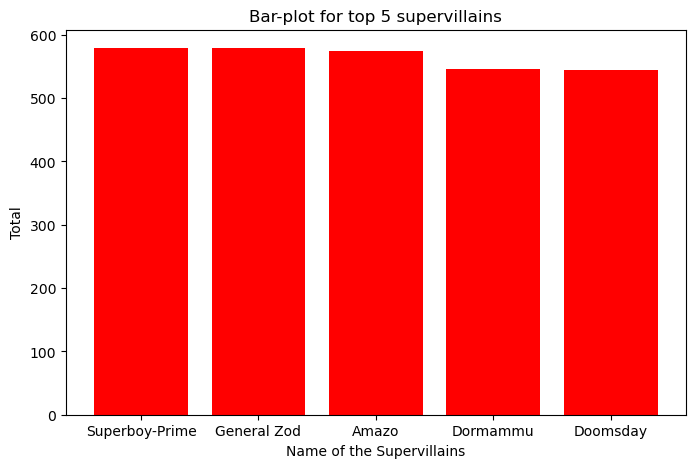

In [114]:
bad_total=bad.sort_values(by=["total"],ascending=False)
plt.figure(figsize=(8,5))
plt.bar(list(bad_total['name'])[0:5],list(bad_total['total'])[0:5],color='r')
plt.title('Bar-plot for top 5 supervillains')
plt.xlabel('Name of the Supervillains')
plt.ylabel('Total')
plt.show()

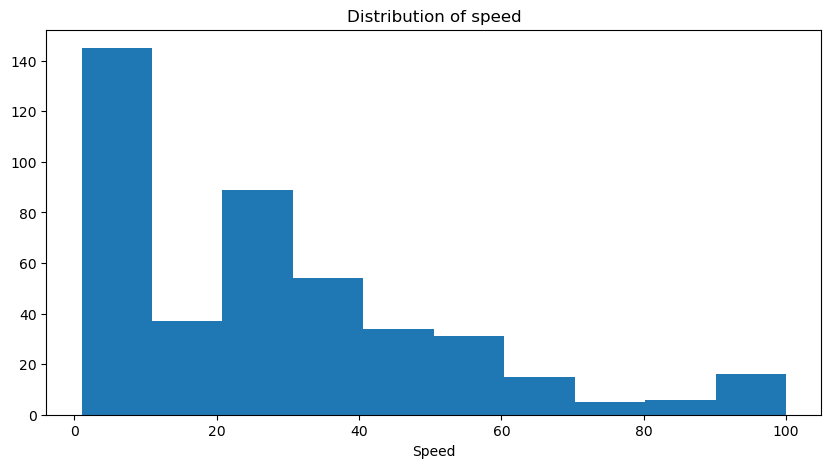

In [44]:
#Making a histogram for speed speed for good superheros
plt.figure(figsize=(10,5))
plt.hist(good['speed'])
plt.title('Distribution of speed')
plt.xlabel('Speed')
plt.show()

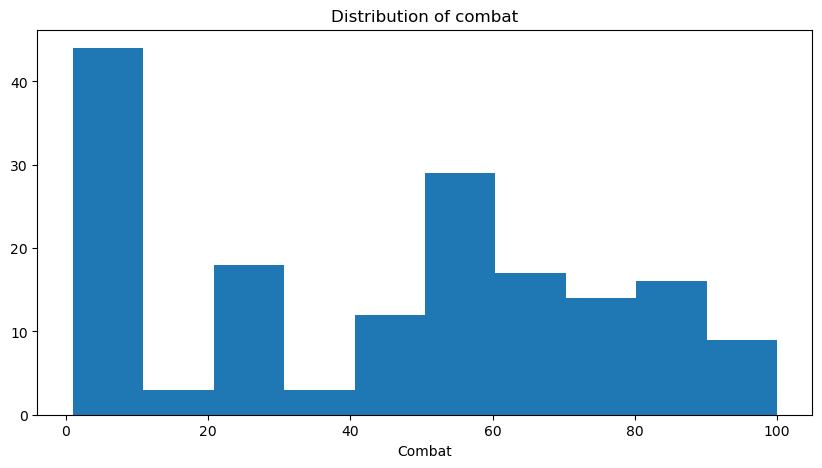

In [46]:
#Making a histogram for Combat for bad supervillains
plt.figure(figsize=(10,5))
plt.hist(bad['combat'])
plt.title('Distribution of combat')
plt.xlabel('Combat')
plt.show()

## The most intelligent characters

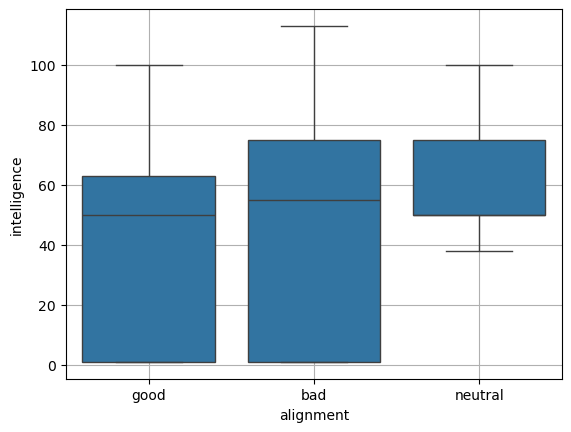

In [123]:
# Box-plot to compare the intelligence among the good, bad and neutral characters.
sns.boxplot(data=df, x="alignment", y="intelligence")
plt.grid(True)